In [15]:
'''

1. Customer Segmentation (Mall Customers)
Dataset: https://raw.githubusercontent.com/ybifoundation/Dataset/main/Mall_Customers.csv
Tasks
 Encode Gender
 Normalize features
 Use Elbow method to select k
 Apply K-means
 Interpret clusters (spenders, savers)

'''

'\n\n1. Customer Segmentation (Mall Customers)\nDataset: https://raw.githubusercontent.com/ybifoundation/Dataset/main/Mall_Customers.csv\nTasks\n\uf0b7 Encode Gender\n\uf0b7 Normalize features\n\uf0b7 Use Elbow method to select k\n\uf0b7 Apply K-means\n\uf0b7 Interpret clusters (spenders, savers)\n\n'

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('Mall_Customers1.csv')  ## import the dataset

In [18]:
df  ## show the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
df1 = df.drop(['CustomerID'],axis=1)  ## drop the unecessary column

In [20]:
df1  ## after drop show the dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [21]:
df1.isnull().sum()  ## check null

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [23]:
le = LabelEncoder()  ## create object of label encoder

In [24]:
df1['Gender'] = le.fit_transform(df1['Gender'])  ## lebelling gender column

In [26]:
col = ['Age','Annual Income (k$)','Spending Score (1-100)']  ## fetch this column whose use for standard scaler

In [27]:
scaler = StandardScaler()  ## create object of standard scaler

In [28]:
df1[col] = scaler.fit_transform(df1[col])  ## use standard scaler

In [29]:
df1.head()  ## after use label encoder , show the dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


In [30]:
from sklearn.cluster import KMeans

In [ ]:
## elbow method to find the n_clusters

In [40]:
error=[]

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df1)
    error.append(km.inertia_) 
print(error)

[649.2799999999997, 438.52241155677746, 345.97681560697487, 254.28290726083475, 216.7849015165104, 202.48745508600138, 171.3726604894381, 160.66341896915887, 141.9948458413197, 134.97563894214804]


C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:14

Text(0, 0.5, 'Error')

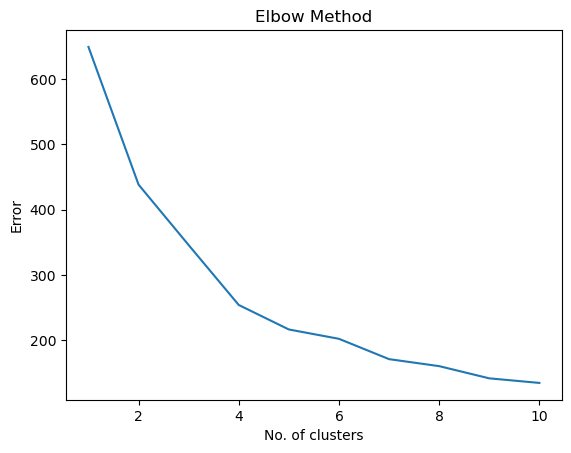

In [46]:
## plot error v/s clusters
plt.plot(range(1,11),error)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('Error')

In [42]:
km1 = KMeans(n_clusters=7)  ## create object of kmeans

In [43]:
km1.fit_predict(df1)  ## predict

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 3, 2,
       3, 2, 1, 5, 5, 5, 1, 2, 5, 4, 1, 1, 1, 4, 5, 4, 4, 5, 4, 1, 4, 5,
       1, 4, 5, 5, 4, 1, 4, 4, 4, 5, 1, 1, 5, 1, 4, 1, 4, 1, 5, 1, 1, 5,
       1, 1, 4, 5, 1, 1, 5, 5, 1, 5, 1, 5, 5, 1, 4, 5, 1, 5, 4, 4, 4, 4,
       4, 5, 1, 5, 5, 5, 4, 1, 1, 1, 5, 1, 1, 0, 5, 0, 1, 0, 6, 0, 6, 0,
       5, 0, 5, 0, 6, 0, 5, 0, 6, 0, 5, 0, 5, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 0, 6, 0, 1, 0, 5, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0])

In [45]:
km1.inertia_  ## error of this model

165.39039978544375

In [ ]:
'''

Model Interpretation :
        1.Data Preparation:
                i) Unnecessary columns such as CustomerID were removed because they do not carry behavioral meaning.
                ii) Numerical features (e.g., Age, Annual Income, Spending Score,gender) were scaled using StandardScaler.
                iii) Scaling ensured that all features contributed equally to the Euclidean distance used by K-Means.
        2. Choice of Algorithm : 
                K-Means clustering was selected because:
                    The objective is to group customers based on similar purchasing behavior.
                    K-Means is efficient and interpretable for customer segmentation.
        3. Elbow Method Result:
                i) The Elbow Method was applied by plotting Within-Cluster Sum of Squares (WCSS) against different values of k.
                ii) A noticeable elbow point occurred at k = 7, where:
                iii) Adding more clusters resulted in only marginal reduction in error.
                iv) This indicates an optimal balance between model complexity and cluster compactness.
        4. Interpretation of 7 Clusters:
                Each cluster represents a distinct customer segment with similar gender , income, age, and spending behavior.
                Typical interpretations (may vary slightly based on centroids):

                Cluster 1:
                    High income – High spending
                         Premium / loyal customers

                Cluster 2:
                    High income – Low spending
                         Potential customers (need targeted offers)

                Cluster 3:
                    Low income – High spending
                         Value-seeking but frequent buyers

                Cluster 4:
                    Low income – Low spending
                         Low-value customers

                Cluster 5:
                    Medium income – Medium spending
                         Average customers

                Cluster 6:
                    Young customers with high spending scores
                         Trend-driven / impulsive buyers

                Cluster 7:
                    Older customers with conservative spending
                         Stable but cautious buyers
            5. Business Insights:
                    The model successfully separates customers into actionable groups.
                    Each cluster can be targeted with different marketing strategies, discounts, or loyalty programs.
                    Helps in personalized marketing, inventory planning, and customer retention.
            

'''

In [ ]:
'''

Model Conclusion :

1. StandardScaler was essential to avoid bias due to different feature scales.
2. Dropping unnecessary columns improved clustering relevance.
3. Elbow Method identified 7 optimal clusters with low intra-cluster error.
4.K-Means effectively grouped customers based on purchasing behavior.
5. The clusters are meaningful, interpretable, and useful for business decisions.
6. The model provides a strong foundation for customer segmentation and targeted marketing.

'''